In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from numpy.random import randint

stops = set(stopwords.words('english'))

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_colwidth',150)

In [2]:
def get_emotion_data(emotion_name, column_names = ['id','text','emotion','intensity']):
    train_data = pd.read_csv('source_data/train/{0}-ratings-0to1.train.txt'.format(emotion_name),
                             delimiter='\t',header=None, names = column_names)
    dev_data = pd.read_csv('source_data/dev/{0}-ratings-0to1.dev.gold.txt'.format(emotion_name),
                           delimiter='\t',header=None, names = column_names)
    test_data = pd.read_csv('source_data/test/{0}-ratings-0to1.test.gold.txt'.format(emotion_name),
                            delimiter='\t',header=None, names = column_names)
    
    return train_data, dev_data, test_data

In [3]:
def clean_text(text, remove_stopwords=True):
    text = re.sub(r"@\w{1,15}", "@USERNAME", text)
    text = re.sub(r'\\n',' ',text)
    text = re.sub(r'&amp',' ',text)
    text = re.sub(r"[^A-Za-z0-9^,!.#\/'+=@]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " !", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    
    text = text.lower().split()
    
    if remove_stopwords:
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    
    return text

In [4]:
main_emotions = ['anger','fear','joy','sadness']

full_data={}
bfull_Y = {}
for emotion in main_emotions:
    full_data[emotion] = get_emotion_data(emotion)
    
    for data in full_data[emotion]:
        data['cleaned_text'] = data['text'].map(clean_text)

## –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç–æ–≤

/opt/lab/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


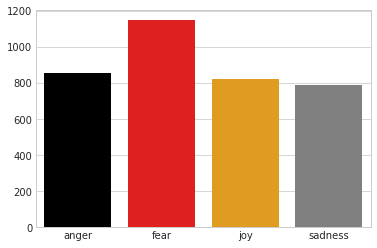

In [6]:
bar_plot_axes = sns.barplot(x=main_emotions, y=[len(full_data[emotion][0])for emotion in main_emotions],
            palette=['black','red','orange','gray'])

## –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–π —ç–º–æ—Ü–∏–∏

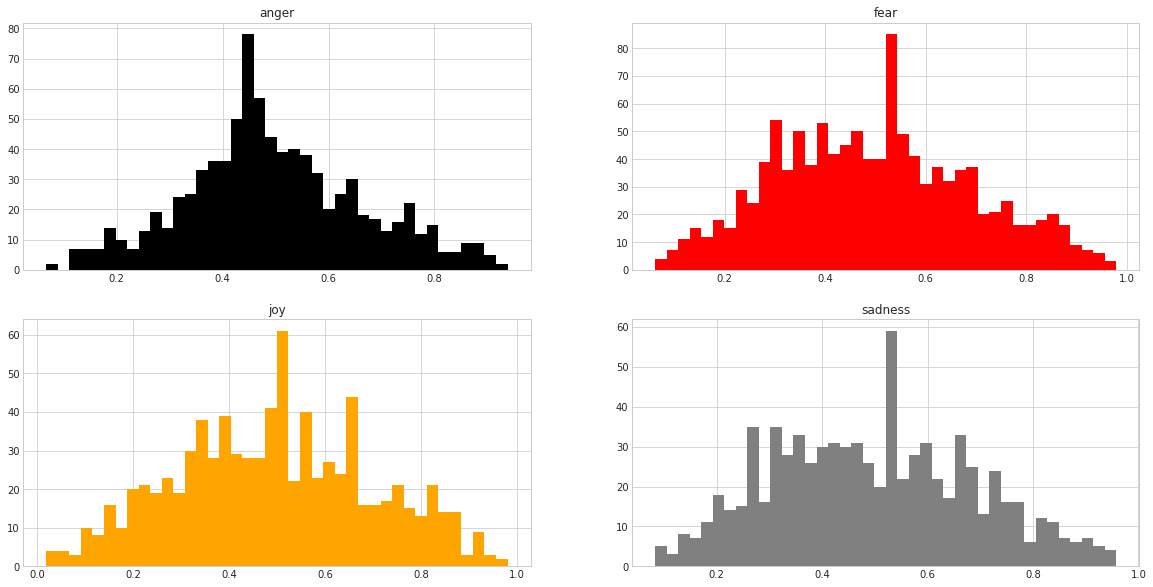

In [8]:
emotion2color = {'anger':'black',
                 'fear':'red',
                 'joy':'orange',
                 'sadness':'gray'}
fig = plt.figure(figsize=(20,10))
for i,emotion in enumerate(main_emotions):
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(full_data[emotion][0]['intensity'], bins=40,color=emotion2color[emotion])
    ax.set_title(emotion)
fig.savefig("emo_hist.png")
plt.show()

## –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–ª–æ–≤–∞

In [9]:
def get_color_func(emotion):
    
    def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
        if emotion == 'sadness':
            return "hsl({0},{1}%,{2}%)".format(0,0,randint(50,80))
        if emotion == 'fear':
            return "hsl({0},{1}%,{2}%)".format(0,82,randint(10,40))
        if emotion == 'joy':
            return "hsl({0},{1}%,{2}%)".format(randint(25,40),randint(80,100),randint(40,60))
        return "hsl({0},{1}%,{2}%)".format(randint(0,5),randint(0,5),randint(0,10))
    return color_func

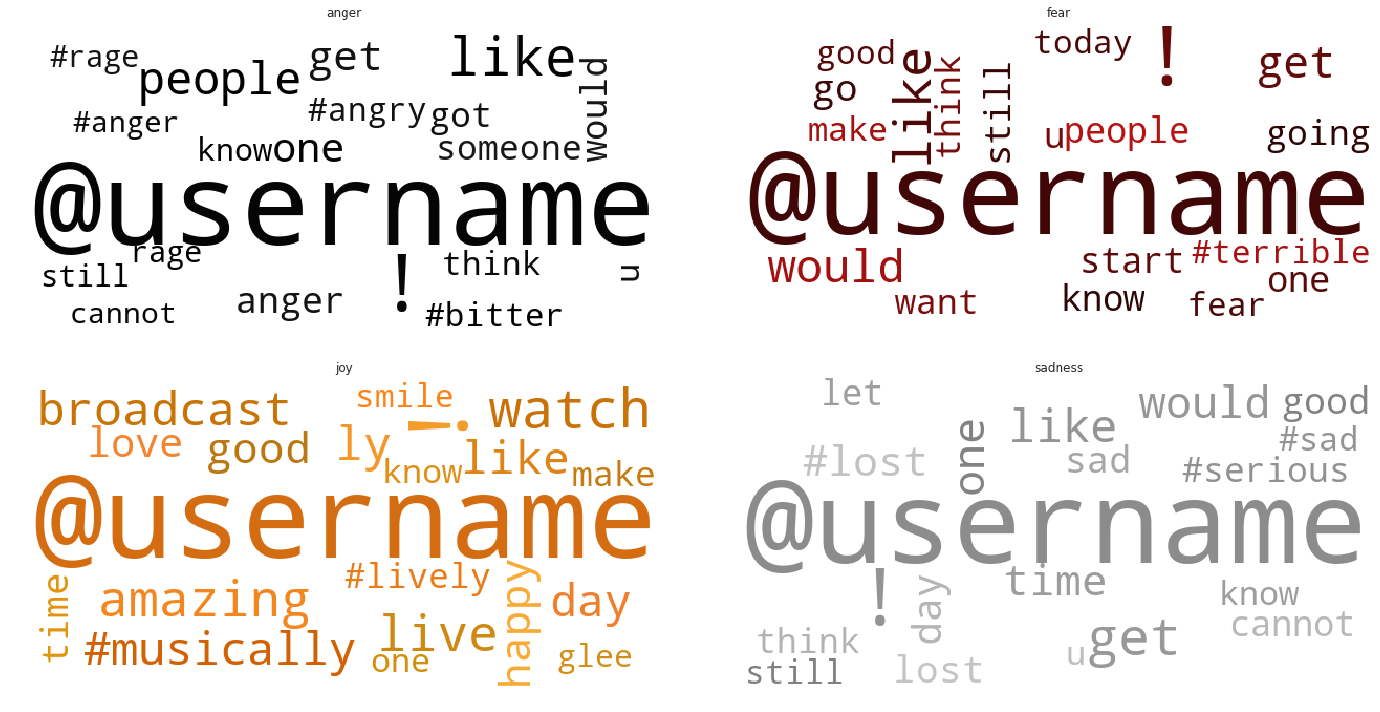

In [11]:
fig = plt.figure(figsize=(20, 10))
top_words_count = 20
for i, emotion in enumerate(main_emotions):
    words_sequence = full_data[emotion][0]['cleaned_text'].str.split(expand=True).unstack().value_counts()
    word_freqs = dict(zip(words_sequence.index[:top_words_count], words_sequence.values[:top_words_count]))
    w—Å= WordCloud(max_font_size=250, 
                  height=300, 
                  width=600,
                  background_color='white',).generate_from_frequencies(word_freqs)
    default_colors = w—Å.to_array()
    w—Å =w—Å.recolor(color_func=get_color_func(emotion), random_state=3)
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(emotion)
    ax.imshow(w—Å)
    ax.axis("off")
        
fig.tight_layout()
plt.show()

## –ö–∞—á–µ—Å—Ç–≤–æ –¥–∞—Ç–∞—Å–µ—Ç–∞

### –î—É–±–ª–∏–∫–∞—Ç—ã

In [12]:
def find_first_duplicate(data, twit_id, sentence):
    first_word_count = 13
    prefix = sentence[:first_word_count]
    ids = data[(data['text'].str.contains(prefix)) & (data['id']!=twit_id)]['id'].values
    if len(ids)==0:
        return np.nan
    return ids[0]

In [13]:
train_anger = full_data['anger'][0]

In [14]:
train_anger['duplicate'] = train_anger.apply(lambda row: find_first_duplicate(train_anger, 
                                                                              row['id'], 
                                                                              row['text']),axis=1)

In [15]:
duplicate_example = pd.merge(train_anger[~train_anger['duplicate'].isnull()], 
         train_anger[['id','text','intensity']],
         how='left',
         left_on='duplicate', right_on='id', 
         suffixes=('_left', '_right'))[['text_left','intensity_left','text_right','intensity_right']]

In [16]:
duplicate_example.head(6)

text_left  \
0                So my Indian Uber driver just called someone the N word. If I wasn't in a moving vehicle I'd have jumped out #disgusted    
1                            @DPD_UK I asked for my parcel to be delivered to a pick up store not my address #fuming #poorcustomerservice   
2  so ef whichever butt wipe pulled the fire alarm in davis bc I was sound asleep #pissed #angry #upset #tired #sad #tired #hangry ######   
3           Don't join @BTCare they put the phone down on you, talk over you and are rude. Taking money out of my acc willynilly! #fuming   
4                                                                                                                     My blood is boiling   
5    When you've still got a whole season of Wentworth to watch and a stupid cunt in work ruins it for us üò≠üò≠ @__KirstyGA #raging #oldcunt   

   intensity_left  \
0           0.896   
1           0.896   
2           0.896   
3           0.896   
4           0.875   
5           0.875   

                                                                                                                          text_right  \
0  So my Indian Uber driver just called someone the N word. If I wasn't in a moving vehicle I'd have jumped out #disgusted #offended   
1                              @DPD_UK I asked for my parcel to be delivered to a pick up store not my address  #poorcustomerservice   
2   so ef whichever butt wipe pulled the fire alarm in davis bc I was sound asleep #pissed  #upset #tired #sad #tired #hangry ######   
3             Don't join @BTCare they put the phone down on you, talk over you and are rude. Taking money out of my acc willynilly!    
4               @ArizonaCoyotes not to mention the GRA guy stops me but let's the 2 ppl in front of me go. WTF. My blood is boiling.   
5      When you've still got a whole season of Wentworth to watch and a stupid cunt in work ruins it for us üò≠üò≠ @__KirstyGA  #oldcunt   

   intensity_right  
0            0.729  
1            0.625  
2            0.771  
3            0.604  
4            0.854  
5            0.625

### –°–∞—Ä–∫–∞–∑–º

In [17]:
train_anger[train_anger['id'] == 10050][['id','text','emotion','intensity']]

id            text emotion  intensity
50  10050  Im so angry üòÇüôÉ   anger       0.75